# Baseline Alignment of Various Aggregation Techniques

In [1]:
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
sns.set_theme()
sns.set_style("whitegrid")

In [35]:
models = ["gpt2-small", "gpt2-medium", "gpt2-large", "gpt2-xl"]
methods = ["lt", "ltsw", "ltmw"]

In [36]:
# load the results in
scores = []
for mt in methods:
    mts = []
    for m in models:
        s = pickle.load(open(f"../data/align-benchmark/{m}-{mt}.pkl", "rb"))
        mts.append(torch.stack(s).mean(0).mean(1))
    scores.append(mts)

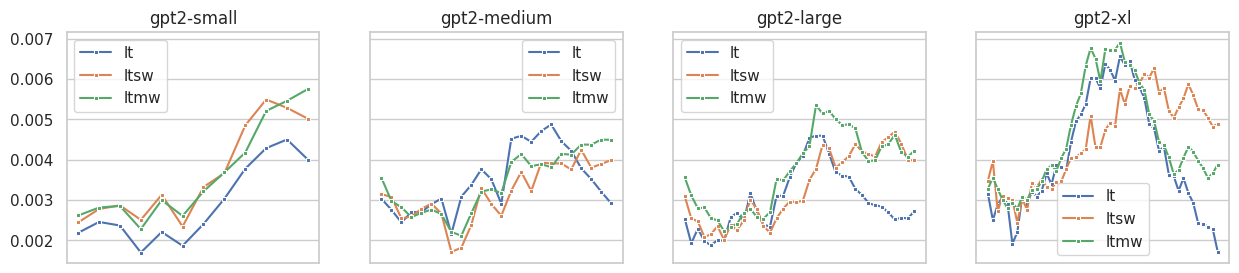

In [38]:
fig, axs = plt.subplots(1, len(models), figsize=(15,3), sharey=True)
for i in range(len(methods)):
    for j in range(len(models)):
        sns.lineplot(scores[i][j],marker="s", markersize=3, ax=axs[j], label=methods[i])
        axs[j].set_xticks([])
        axs[j].set_title(models[j])